##### HFO test using HFO-detect python toolbox

In [3]:
import pyhfo_detect
import os, pickle, requests, tempfile
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
%matplotlib notebook

Data loaded, file removed. Calculating transforms


<IPython.core.display.Javascript object>


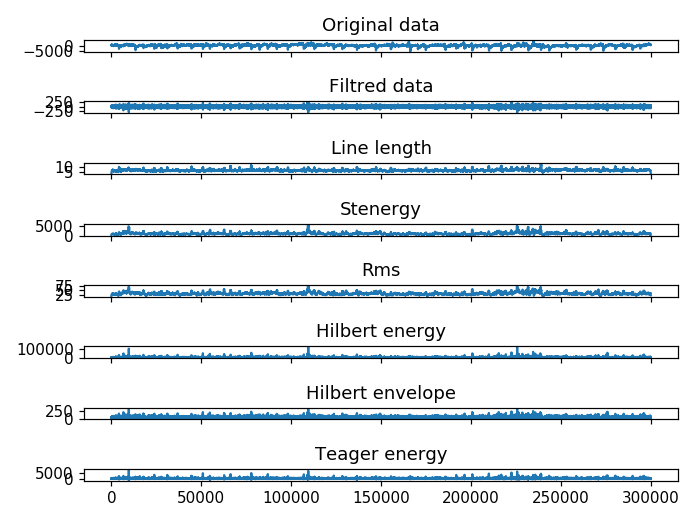

In [5]:
# %% Auxiliary
def download_file(url, local_file):
    r = requests.get(url, stream=True)
    with open(local_file, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk:
                f.write(chunk)
                #f.flush() commented by recommendation from J.F.Sebastian
    return

# %% Get the data
print('Downloading example file')
# Download the data file
file_link = "https://raw.github.com/HFO-detect/HFO-detect-python/master/example_data/seeg.pkl"
local_file = tempfile.gettempdir()+'/hfo_detect_example.pkl'

download_file(file_link, local_file)

# Read the data
data_dict = pickle.load(open(local_file,'rb'))

data_arr = data_dict['data']
channels = data_dict['channels']
fsamps = data_dict['fsamp']

# Remove the file
os.remove(local_file)

print('Data loaded, file removed. Calculating transforms')

# %% Presets - metadata - suggested 
met_dat = {'channel_name':"B'1", 'pat_id':'Nobody'}

data = data_arr[channels.index(met_dat['channel_name'])]
fs = fsamps[channels.index(met_dat['channel_name'])]

low_fc = 80
high_fc = 600
treshold = 1
window_size = 0.1
window_overlap = 0.25

# %% Create transforms

# Calculate window values for easier operation
samp_win_size = int(window_size*fs) # Window size in samples
samp_win_inc = int(samp_win_size*window_overlap) # Window increment in samples
   
# Filter the signal
    
b, a = butter (3,[low_fc/(fs/2), high_fc/(fs/2)], 'bandpass')
filt_data = filtfilt(b, a, data)
    
# Transform the signal - one sample window shift
    
Line_length = pyhfo_detect.signal_transform.compute_line_lenght(filt_data, window_size*fs)
Hilbert_energy = pyhfo_detect.signal_transform.compute_hilbert_energy(filt_data)
Hilbert_envelope = pyhfo_detect.signal_transform.compute_hilbert_envelope(filt_data)
Stenergy = pyhfo_detect.signal_transform.compute_stenergy(filt_data, window_size * fs)
Teager_energy = pyhfo_detect.signal_transform.compute_teager_energy(filt_data)
Rms = pyhfo_detect.signal_transform.compute_rms(filt_data, window_size*fs)

# Plot
fig, axes_arr = plt.subplots(8,1,sharex=True)

axes_arr[0].plot(data)
axes_arr[0].set_title('Original data')

axes_arr[1].plot(filt_data)
axes_arr[1].set_title('Filtred data') 

axes_arr[2].plot(Line_length)
axes_arr[2].set_title('Line length')

axes_arr[3].plot(Stenergy)
axes_arr[3].set_title('Stenergy')

axes_arr[4].plot(Rms)
axes_arr[4].set_title('Rms')
 
axes_arr[5].plot(Hilbert_energy)
axes_arr[5].set_title('Hilbert energy')

axes_arr[6].plot(Hilbert_envelope)
axes_arr[6].set_title('Hilbert envelope')

axes_arr[7].plot(Teager_energy)
axes_arr[7].set_title('Teager energy')
plt.tight_layout()